In [27]:
from coffea.processor import ProcessorABC

In [28]:
import hist.dask as hda

In [29]:
import awkward

In [30]:
class SimpleAnalysis(ProcessorABC): # Basic Processor (Most Imp)
    def __init__(self):
        pass
    def process(self,events): # Actual computation
        pt = events.Electron.pt
        h = hda.Hist.new.Reg(100,0,500).Double()
        h.fill(awkward.flatten(pt))
        output = {
            "Electron" : {
                "Tranverse Momentum":h
            }
        }
        return output
    def postprocess(self):
        pass

In [31]:
fileset = {
    "ActualData":
    {
        "files":
        {
            "2025-06-15-hsf-india-tutorial-bangalore/data/SMHiggsToZZTo4L.root":"Events"
            # "../../../../../../../../../../../coffea-fcc-analyses/data/CMS_Run2018A_MET/0F8C0C8C-63E4-1D4E-A8DF-506BDB55BD43.root":"Events",
            # "../../../../../../../../../../../coffea-fcc-analyses/data/CMS_Run2018A_MET/0F8C0C8C-63E4-1D4E-A8DF-506BDB55BD43.root":"Events"
        },
    },
    "SimulatedData":
    {
        "files":
        {
            "2025-06-15-hsf-india-tutorial-bangalore/data/SMHiggsToZZTo4L.root":"Events"
            # "../../../../../../../../../../../coffea-fcc-analyses/data/CMS_MC/AB153EDD-63CA-F340-B8E3-9A2E07FB52B3.root":"Events",
            # "../../../../../../../../../../../coffea-fcc-analyses/data/CMS_MC/AB153EDD-63CA-F340-B8E3-9A2E07FB52B3.root":"Events",
        }
    }
}

In [32]:
from coffea.dataset_tools import preprocess

In [33]:
a, b = preprocess(
    fileset
)

In [34]:
from coffea.dataset_tools import apply_to_fileset

In [35]:
from coffea.nanoevents import NanoAODSchema

In [36]:
to_compute = apply_to_fileset(
    SimpleAnalysis(),
    a,
    schemaclass=NanoAODSchema # Set of useful funcs for special experiments
)

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missi

In [37]:
import dask # Scaling

In [38]:
output, = dask.compute(to_compute)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd0ba211790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

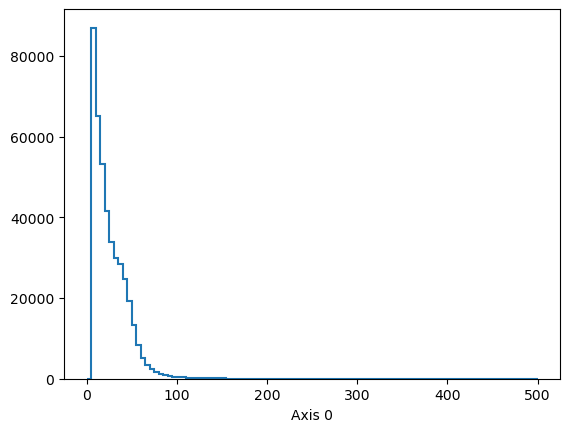

In [39]:
output['SimulatedData']['Electron']['Tranverse Momentum'].plot()